In [1]:
from src.preprocessing_modules import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
import umap
import pymde

In [2]:
# Set the random seed
tf.random.set_seed(0)
tf.keras.utils.set_random_seed(0)   
tf.config.experimental.enable_op_determinism()

# First Data: GSE100866

## Gene Only

In [3]:
data_directory = 'Sample Datasets/GSE100866'
meta_data, pro, rna, cite_seq_data, labels_encoder, labels, data_with_targets = compile_data(data_directory, cell_type_col)
train_data, test_data, train_labels, test_labels = generate_training(data_with_targets, pro, gene_only = True)
history, autoencoder, encoder = gene_only_encoder(train_data, test_data, 64, 'GSE100866', 'gene_only')
# Perform the TSNE on the bottleneck layer of the encoded data and the non encoded data
N_predict = 2000
# Make the encoder do its job. We can now store this as an output to a var
training_predicted = encoder.predict(test_data[:N_predict])
# Perform TSNE on 2 components so we can visualise it.
train_encoded = TSNE(n_components = 2, init = 'pca', learning_rate = 'auto',random_state = 0).fit_transform(training_predicted)
train_unencoded = TSNE(n_components = 2, init = 'pca', learning_rate = 'auto',random_state = 0).fit_transform(test_data[:N_predict])

Reading Data in Sample Datasets/GSE100866/

Metadata found!
Protein Data Found!
RNA-seq data found!

Reading in the data!
Loaded metadata
Loaded protein data
Loaded rna data
MODEL ALREADY EXISTS, TO RETRAIN, SET PARAM "override = True"


C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [4]:
reducer = umap.UMAP()
train_encoded_umap = reducer.fit_transform(training_predicted)
train_unencoded_umap = reducer.fit_transform(test_data[:N_predict])

### Visualization: tSNE-Gene Only vs Control, UMAP-Gene Only vs Control

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Clustering Score of "first-arg data": 0.729
Clustering Score of "second-arg data": 0.537


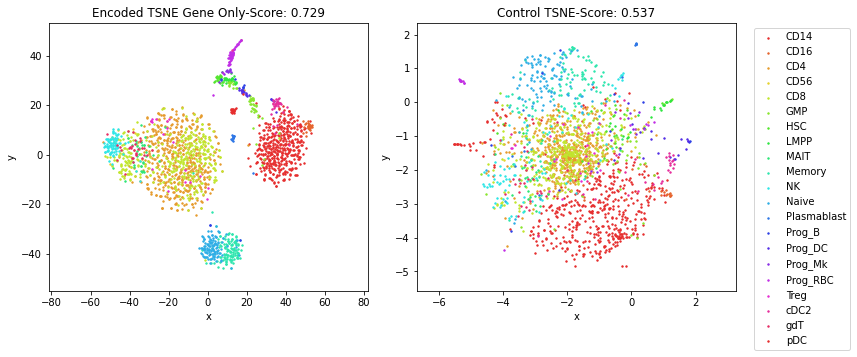

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Clustering Score of "first-arg data": 0.7385
Clustering Score of "second-arg data": 0.319


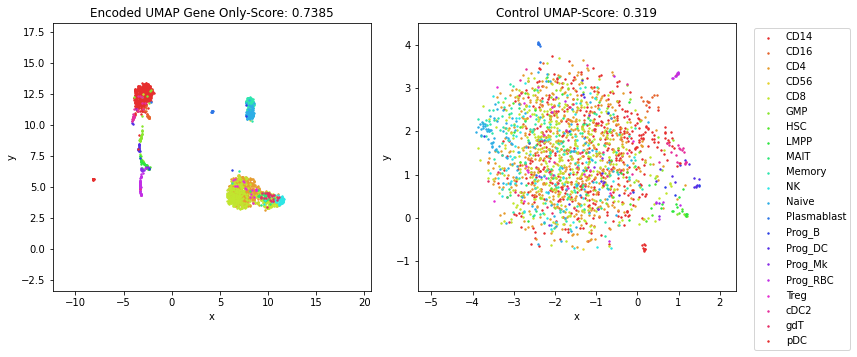

In [5]:
color = generate_color(labels_encoder, labels)
color_map = generate_colormap(color, labels_encoder, labels)
left, right = comparison_cluster(train_encoded, train_unencoded,test_labels, N_predict = 2000)
vis_data2d(train_encoded, train_unencoded, test_labels, labels_encoder, color_map, 2000,
           left_label = f'Encoded TSNE Gene Only-Score: {left}', right_label = f'Control TSNE-Score: {right}', spacer = 'GSE100866/geneOnly_TSNE')

color = generate_color(labels_encoder, labels)
color_map = generate_colormap(color, labels_encoder, labels)
left, right = comparison_cluster(train_encoded_umap, train_unencoded_umap,test_labels, N_predict = 2000)
vis_data2d(train_encoded_umap, train_unencoded_umap, test_labels, labels_encoder, color_map, 2000,
           left_label = f'Encoded UMAP Gene Only-Score: {left}', right_label = f'Control UMAP-Score: {right}', spacer = 'GSE100866/geneOnly_UMAP')

## Gene and Protein

In [6]:
tf.random.set_seed(0)
tf.keras.utils.set_random_seed(0)   
tf.config.experimental.enable_op_determinism()
data_directory = 'Sample Datasets/GSE100866'
meta_data, pro, rna, cite_seq_data, labels_encoder, labels, data_with_targets = compile_data(data_directory, cell_type_col)

train_data, test_data, train_labels, test_labels = generate_training(data_with_targets, pro, gene_only = False)
gene_train_data,pro_train_data,gene_test_data,pro_test_data = split_training_with_labels(train_data, test_data, pro)

Reading Data in Sample Datasets/GSE100866/

Metadata found!
Protein Data Found!
RNA-seq data found!

Reading in the data!
Loaded metadata
Loaded protein data
Loaded rna data


In [7]:
history, autodecoder, merged = gene_protein_encoder(pro_train_data,gene_train_data,pro_test_data, gene_test_data, 64, 'GSE100866', 'gene_pro')
# Perform the TSNE on the bottleneck layer of the encoded data and the non encoded data
N_predict = 2000
# Make the encoder do its job. We can now store this as an output to a var
training_predicted = merged.predict([gene_test_data[:N_predict],pro_test_data[:N_predict]])
# Perform TSNE on 2 components so we can visualise it.
train_encoded_gp = TSNE(n_components = 2, init = 'pca', learning_rate = 'auto',random_state = 0).fit_transform(training_predicted)

MODEL ALREADY EXISTS, TO RETRAIN, SET PARAM "override = True"


C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [8]:
reducer = umap.UMAP()
train_encoded_gp_UMAP = reducer.fit_transform(training_predicted)

### Visualization: tSNE-Gene + Protein vs Gene Only, UMAP-Gene + Protein vs Gene Only

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Clustering Score of "first-arg data": 0.9145
Clustering Score of "second-arg data": 0.729


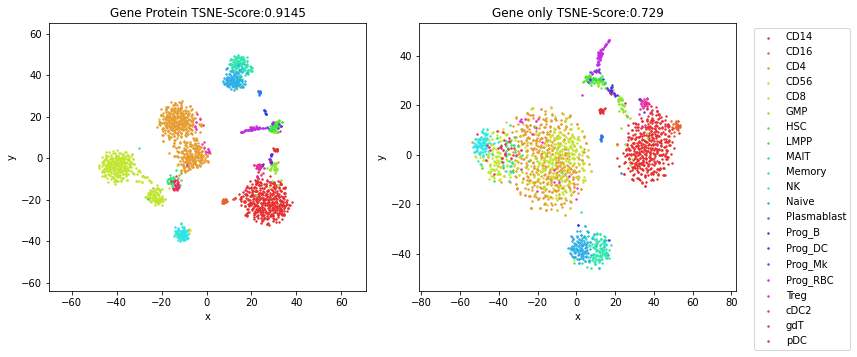

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Clustering Score of "first-arg data": 0.916
Clustering Score of "second-arg data": 0.7385


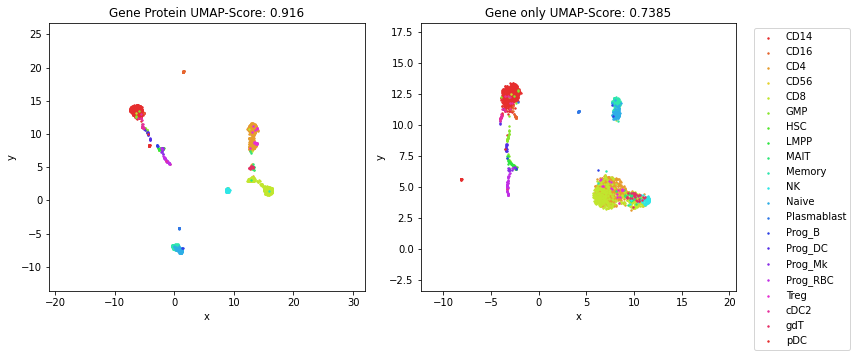

In [9]:
color = generate_color(labels_encoder, labels)
color_map = generate_colormap(color, labels_encoder, labels)
left, right = comparison_cluster(train_encoded_gp, train_encoded,test_labels, N_predict = 2000)
vis_data2d(train_encoded_gp, train_encoded, test_labels, labels_encoder, color_map, 2000, 
           left_label=f'Gene Protein TSNE-Score:{left}', right_label=f'Gene only TSNE-Score:{right}', spacer = 'GSE100866/gene_pro_TSNE')

left, right = comparison_cluster(train_encoded_gp_UMAP, train_encoded_umap,test_labels, N_predict = 2000)
vis_data2d(train_encoded_gp_UMAP, train_encoded_umap, test_labels, labels_encoder, color_map, 2000, 
           left_label=f'Gene Protein UMAP-Score: {left}', right_label=f'Gene only UMAP-Score: {right}', spacer = 'GSE100866/gene_pro_UMAP')

### Usage of Custom Encoders and Custome Decoders for N-Omics data, in this case 2.

In [10]:
tf.random.set_seed(0)
tf.keras.utils.set_random_seed(0)   
tf.config.experimental.enable_op_determinism()
data_directory = 'Sample Datasets/GSE100866'
meta_data, pro, rna, cite_seq_data, labels_encoder, labels, data_with_targets = compile_data(data_directory, cell_type_col)

train_data, test_data, train_labels, test_labels = generate_training(data_with_targets, pro, gene_only = False)
gene_train_data,pro_train_data,gene_test_data,pro_test_data = split_training_with_labels(train_data, test_data, pro)
encoding_g, n_feat_dim_g, node_layers_g, inputs_g = custom_encoder(gene_train_data.shape)
encoding_p, n_feat_dim_p, node_layers_p, inputs_p = custom_encoder(pro_train_data.shape, n_hidden_layer=1)

merged1 = custom_concat([encoding_g, encoding_p], 64)

decoder_g = custom_decoder(merged1, n_feat_dim_g, node_layers_g)
decoder_p = custom_decoder(merged1, n_feat_dim_p, node_layers_p)

history, autodecoder2, merged_m = save_load_build_custom_autoencoders([inputs_g,inputs_p], [decoder_g,decoder_p], merged1,
                                                                    [gene_train_data,pro_train_data], saved_model_dir_name = 'GSE100866')
N_predict = 2000
# Make the encoder do its job. We can now store this as an output to a var
training_predicted_2 = merged_m.predict([gene_test_data[:N_predict],pro_test_data[:N_predict]])
# Perform TSNE on 2 components so we can visualise it.
train_encoded_gp_2 = TSNE(n_components = 2, init = 'pca', learning_rate = 'auto',random_state = 0).fit_transform(training_predicted)

Reading Data in Sample Datasets/GSE100866/

Metadata found!
Protein Data Found!
RNA-seq data found!

Reading in the data!
Loaded metadata
Loaded protein data
Loaded rna data
node_layers are not in the right order, reversing it...
MODEL ALREADY EXISTS, TO RETRAIN, SET PARAM "override = True"


C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [12]:
reducer = umap.UMAP()
train_encoded_gp_UMAP = reducer.fit_transform(training_predicted)
train_encoded_gp_2_UMAP = reducer.fit_transform(training_predicted_2)

### Visualization: tSNE-Gene + Protein vs Gene + Protein Custom, UMAP-Gene + Protein vs Gene + Protein Custom

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Clustering Score of "first-arg data": 0.9145
Clustering Score of "second-arg data": 0.9145


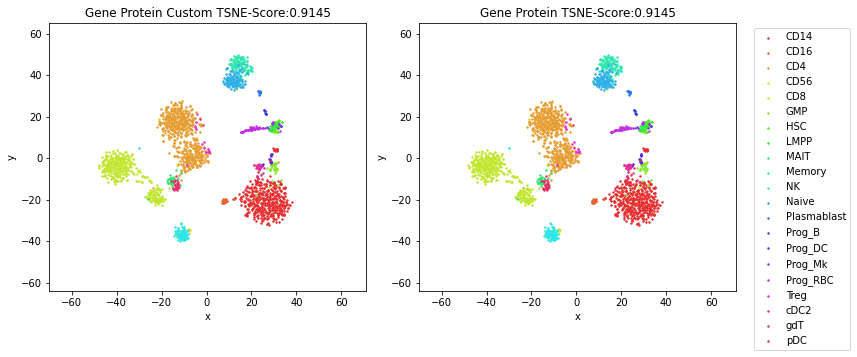

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Clustering Score of "first-arg data": 0.916
Clustering Score of "second-arg data": 0.9005


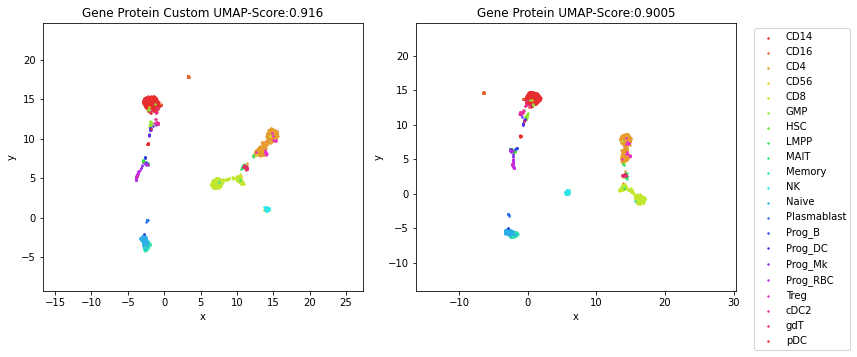

In [13]:
color = generate_color(labels_encoder, labels)
color_map = generate_colormap(color, labels_encoder, labels)

left, right = comparison_cluster(train_encoded_gp_2, train_encoded_gp,test_labels, N_predict = 2000)
vis_data2d(train_encoded_gp_2, train_encoded_gp, test_labels, labels_encoder, color_map, 2000, 
           left_label=f'Gene Protein Custom TSNE-Score:{left}', right_label=f'Gene Protein TSNE-Score:{right}', spacer = 'GSE100866/gene_pro_custom_TSNE')
left, right = comparison_cluster(train_encoded_gp_2_UMAP, train_encoded_gp_UMAP,test_labels, N_predict = 2000)
vis_data2d(train_encoded_gp_2_UMAP, train_encoded_gp_UMAP, test_labels, labels_encoder, color_map, 2000, 
           left_label=f'Gene Protein Custom UMAP-Score:{left}', right_label=f'Gene Protein UMAP-Score:{right}', spacer = 'GSE100866/gene_pro_custom_UMAP')

# Second Data: GSE128639

Reading Data in Sample Datasets/GSE128639/

Metadata found!
Protein Data Found!
RNA-seq data found!

Reading in the data!
Loaded metadata
Loaded protein data
Loaded rna data
MODEL ALREADY EXISTS, TO RETRAIN, SET PARAM "override = True"


C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

Clustering Score of "first-arg data": 0.9326
Clustering Score of "second-arg data": 0.6763


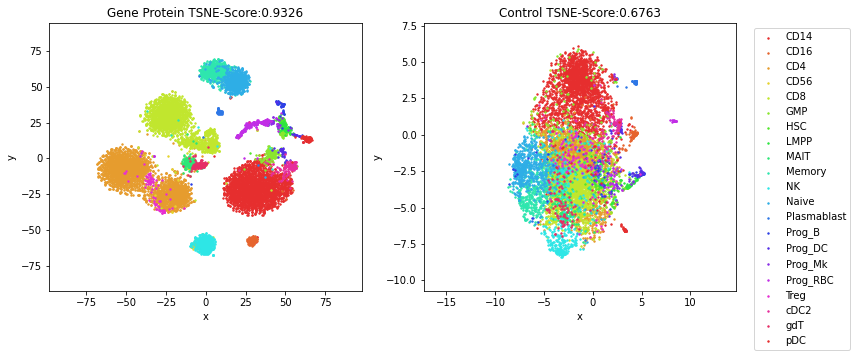

In [15]:
data_directory = 'Sample Datasets/GSE128639'
meta_data, pro, rna, cite_seq_data, labels_encoder, labels, data_with_targets = compile_data(data_directory, cell_type_col)
train_data, test_data, train_labels, test_labels = generate_training(data_with_targets, pro, gene_only = False)
gene_train_data,pro_train_data,gene_test_data,pro_test_data = split_training_with_labels(train_data, test_data, pro)
history, autodecoder, merged = gene_protein_encoder(pro_train_data,gene_train_data,pro_test_data, gene_test_data, 64, 'GSE128639', 'gene_pro')
# Perform the TSNE on the bottleneck layer of the encoded data and the non encoded data
N_predict = 10000
# Make the encoder do its job. We can now store this as an output to a var
training_predicted = merged.predict([gene_test_data[:N_predict],pro_test_data[:N_predict]])
# Perform TSNE on 2 coponents so we can visualise it.
train_encoded = TSNE(n_components = 2, init = 'pca', learning_rate = 'auto',random_state = 0).fit_transform(training_predicted)
train_unencoded = TSNE(n_components = 2, init = 'pca', learning_rate = 'auto',random_state = 0).fit_transform(test_data[:N_predict])
color = generate_color(labels_encoder, labels)
color_map = generate_colormap(color, labels_encoder, labels)
left, right = comparison_cluster(train_encoded, train_unencoded,test_labels, N_predict = 10000)
vis_data2d(train_encoded, train_unencoded, test_labels, labels_encoder, color_map, 10000, 
           left_label=f'Gene Protein TSNE-Score:{left}', right_label=f'Control TSNE-Score:{right}', spacer = 'GSE128639/gene_pro_TSNE')

### Visualization: UMAP-Gene Protein vs Control Data

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Clustering Score of "first-arg data": 0.9208
Clustering Score of "second-arg data": 0.4462


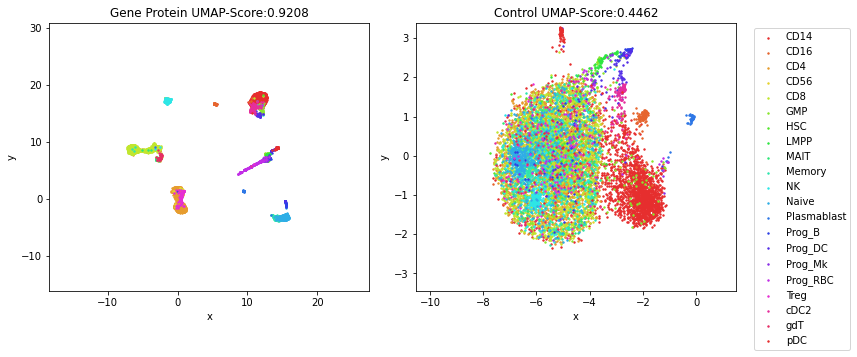

In [16]:
reducer = umap.UMAP()
train_encoded_umap = reducer.fit_transform(training_predicted)
train_unencoded_umap = reducer.fit_transform(test_data[:N_predict])
left, right = comparison_cluster(train_encoded_umap, train_unencoded_umap,test_labels, N_predict = 10000)
vis_data2d(train_encoded_umap, train_unencoded_umap, test_labels, labels_encoder, color_map, 10000, 
           left_label=f'Gene Protein UMAP-Score:{left}', right_label=f'Control UMAP-Score:{right}', spacer = 'GSE128639/gene_pro_UMAP')

### Trying out pymde

In [17]:
import torch

Oct 01 07:52:39 AM: Computing 15-nearest neighbors, with max_distance=None
Sat Oct  1 07:52:39 2022 Building RP forest with 15 trees
Sat Oct  1 07:52:39 2022 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	Stopping threshold met -- exiting after 4 iterations
Oct 01 07:52:39 AM: Computing quadratic initialization.
Oct 01 07:52:41 AM: Fitting a centered embedding into R^2, for a graph with 10000 items and 231530 edges.
Oct 01 07:52:41 AM: `embed` method parameters: eps=1.0e-05, max_iter=300, memory_size=10
Oct 01 07:52:41 AM: iteration 000 | distortion 0.878568 | residual norm 4.15565 | step length 0.00501151 | percent change 0.0147263
Oct 01 07:52:42 AM: iteration 030 | distortion 0.164044 | residual norm 0.00155218 | step length 1 | percent change 2.35105
Oct 01 07:52:43 AM: iteration 060 | distortion 0.146225 | residual norm 0.000721487 | step length 1 | percent change 1.90038
Oct 01 07:52:43 AM: iteration 090 | distortion 0.141977 | residual norm 0.000499075

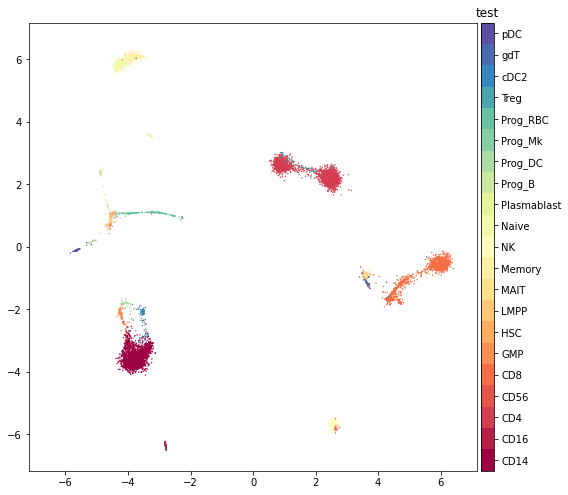

In [36]:
mde = pymde.preserve_neighbors(torch.Tensor(training_predicted), verbose=True)
embedding = mde.embed(verbose=True,snapshot_every=2)
ax = pymde.plot(embedding, color_by=labels_encoder.inverse_transform(test_labels[:10000]), marker_size=2)
plt.tight_layout()
plt.title('test')
plt.savefig('anim/GSE128639/pymde_encode.png')
plt.show()

  0%|          | 0/151 [00:00<?, ?it/s]

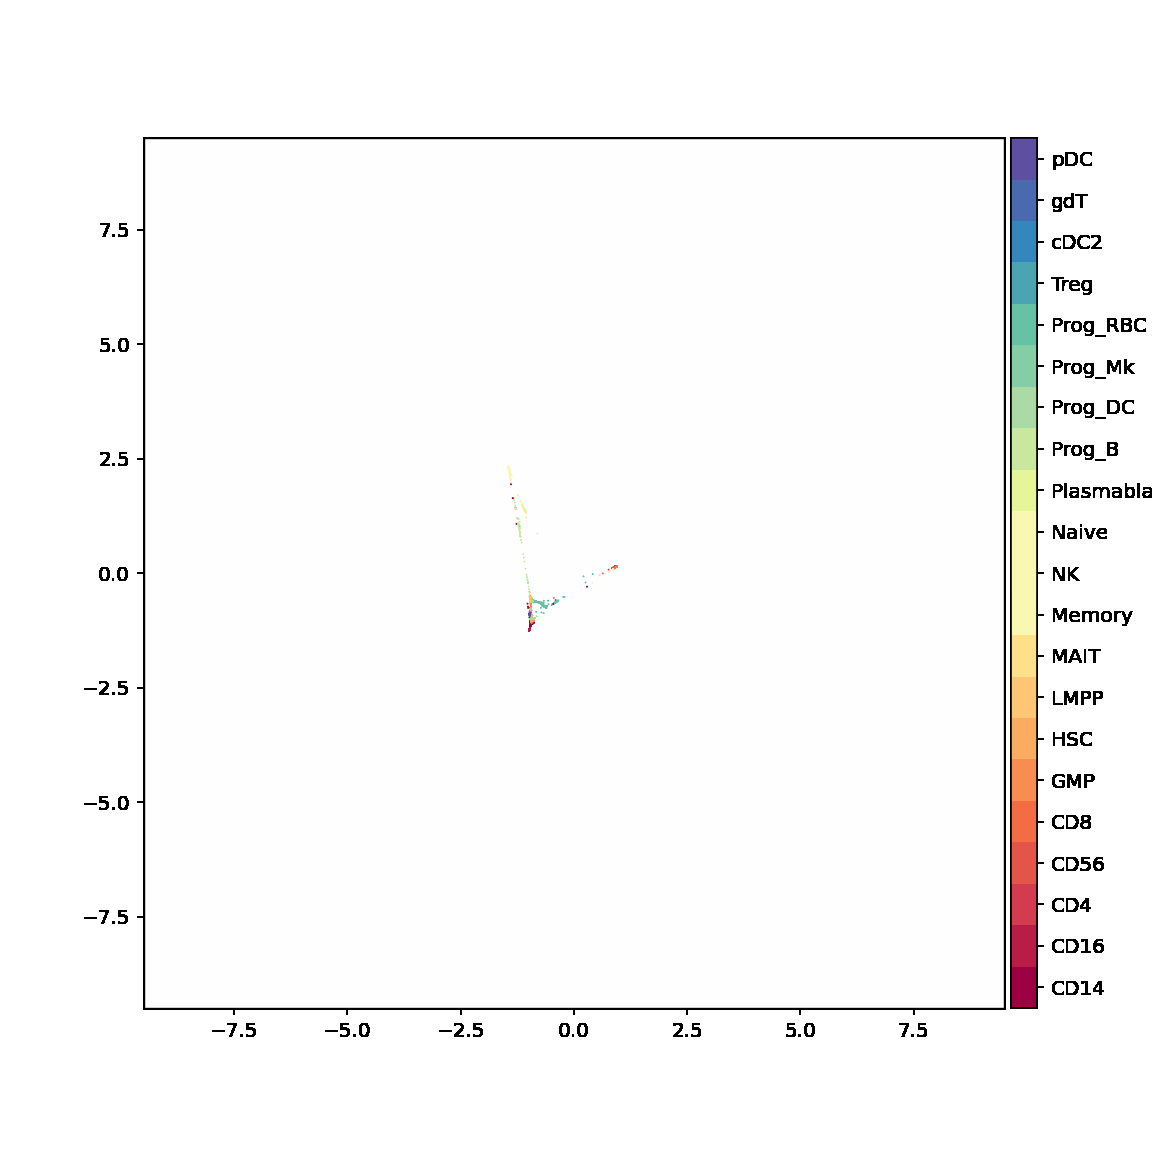

In [30]:
mde.play(savepath='anim/GSE128639/Encoded.gif', color_by=labels_encoder.inverse_transform(test_labels[:10000]))

Oct 01 07:43:13 AM: Computing 15-nearest neighbors, with max_distance=None
Sat Oct  1 07:43:13 2022 Building RP forest with 15 trees
Sat Oct  1 07:43:15 2022 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	 5  /  13
	 6  /  13
	 7  /  13
	Stopping threshold met -- exiting after 7 iterations
Oct 01 07:43:17 AM: Computing quadratic initialization.
Oct 01 07:43:20 AM: Fitting a centered embedding into R^2, for a graph with 10000 items and 297317 edges.
Oct 01 07:43:20 AM: `embed` method parameters: eps=1.0e-05, max_iter=300, memory_size=10
Oct 01 07:43:20 AM: iteration 000 | distortion 2.218719 | residual norm 1.24541 | step length 0.00783061 | percent change 0.00689593
Oct 01 07:43:22 AM: iteration 030 | distortion 0.435584 | residual norm 0.00268275 | step length 1 | percent change 0.825976
Oct 01 07:43:24 AM: iteration 060 | distortion 0.421087 | residual norm 0.00392037 | step length 1 | percent change 0.288657
Oct 01 07:43:26 AM: iteration 090 | distortion 0

  0%|          | 0/151 [00:00<?, ?it/s]

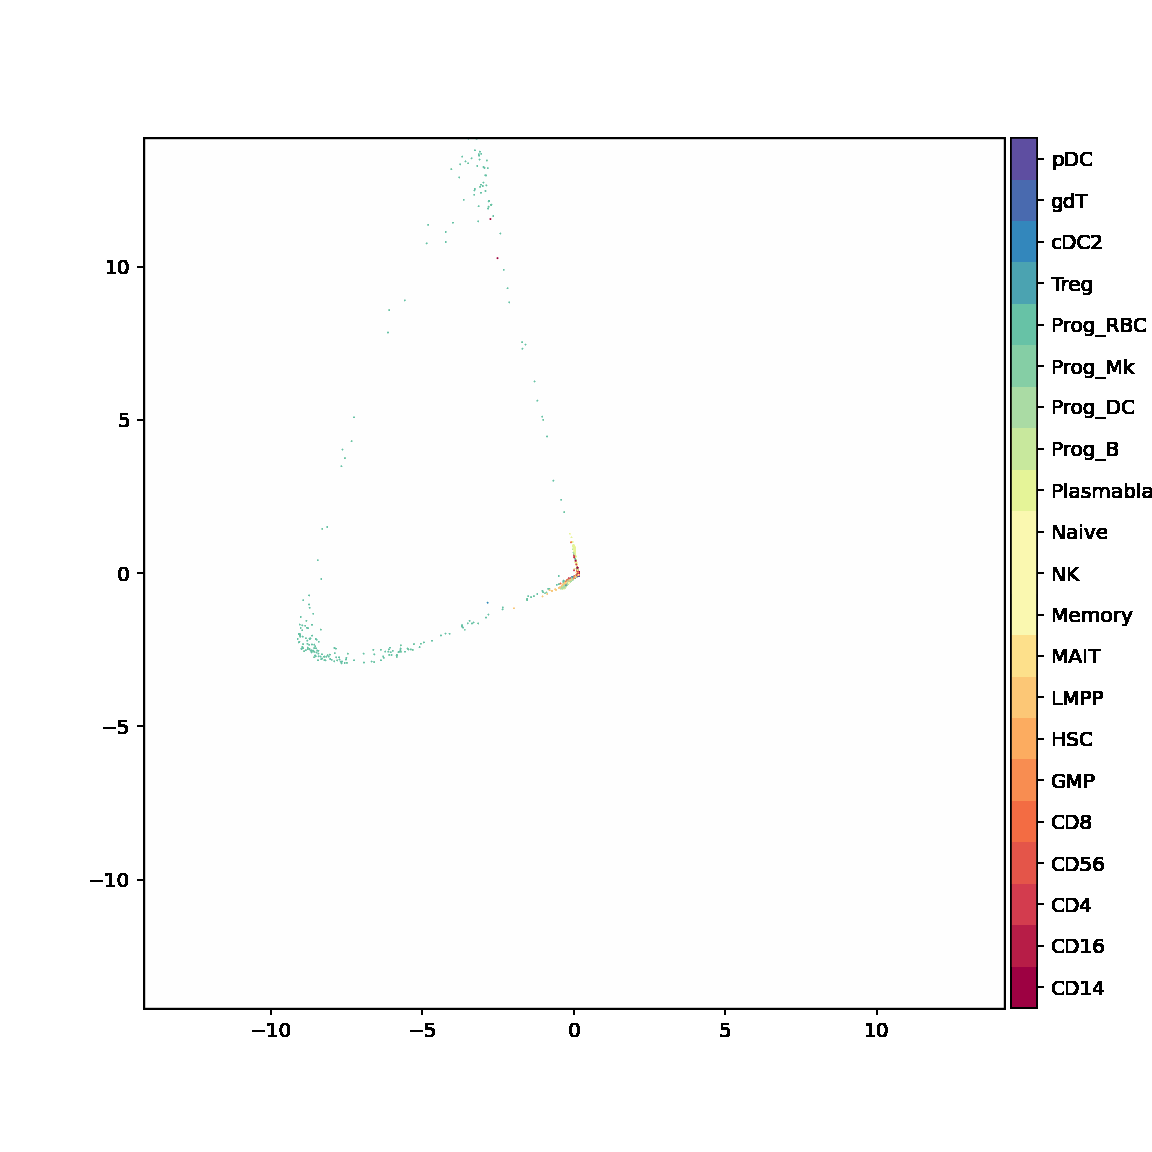

In [31]:
mde = pymde.preserve_neighbors(torch.Tensor(test_data[:10000].to_numpy()), verbose=True)
embedding = mde.embed(verbose=True,snapshot_every=2)
pymde.plot(embedding, color_by=torch.Tensor(test_labels[:10000]).int())
mde.play(savepath='anim/GSE128639/Control.gif', color_by=labels_encoder.inverse_transform(test_labels[:10000]))

In [34]:
embedding

tensor([[ 0.7335,  1.2919],
        [-0.1725, -0.3510],
        [-0.2019,  0.1646],
        ...,
        [ 0.9785,  1.0312],
        [-0.1187, -1.1453],
        [ 0.9552, -1.0518]])